Temat projektu: Wypadki lotnicze w latach 1918 - 2022 (lotnictwo komercyjne). 
Źródło zbioru danych: https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data - dane z lat 1918 - 2022.




In [1]:
# Zaimportowanie podstawowych bibliotek oraz datasetu
import pandas as pd
import numpy as np

crashes = pd.read_csv('Plane Crashes.csv')

In [2]:
# Wyświetlenie pierwszych wierszy z wczytanego zbioru danych
crashes.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [3]:
# Sprawdzenie czy zbiór danych zawiera dane dla katastrof w Polsce 
print(crashes.loc[crashes['Country'] == 'Poland'])

             Date        Time                Aircraft  \
252    1921-02-18   10H 0M 0S            Junkers F.13   
545    1923-12-31         NaN            Junkers F.13   
566    1924-07-14         NaN         Blériot Spad 46   
707    1926-05-26         NaN                Potez 25   
846    1927-08-23         NaN            Junkers A.20   
...           ...         ...                     ...   
26926  2011-07-14  22H 30M 0S               ATR72-200   
26988  2011-11-01  14H 39M 0S          Boeing 767-300   
27443  2014-06-08  11H 15M 0S         PZL-Mielec AN-2   
27458  2014-07-05  16H 11M 0S  Piper PA-31-310 Navajo   
27841  2016-11-24   12H 5M 0S  Piper PA-31-310 Navajo   

                                               Operator Registration  \
252                                       Lloyd-Ostflug        D-128   
545                               Danziger Luftreederei        Dz.40   
566    Compagnie Franco-Roumaine de Navigation Aérienne       F-AEHU   
707                        

In [4]:
# Utworzenie nowej zmiennej zawierającej wiersze ze zbioru danych, gdzie kolumna 'Country' ma wartość 'Poland'
poland_data = crashes.loc[crashes['Country'] == 'Poland']

In [5]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
252,1921-02-18,10H 0M 0S,Junkers F.13,Lloyd-Ostflug,D-128,Flight,Charter/Taxi (Non Scheduled Revenue Flight),No,"Plain, Valley",Gdansk – Berlin,...,Poland,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was performing a flight from Gdansk t...,Human factor
545,1923-12-31,NaN,Junkers F.13,Danziger Luftreederei,Dz.40,Landing (descent or approach),Postal (mail),Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,1.0,0.0,0.0,0.0,0.0,0,The pilot was performing a mail flight. On app...,Unknown
566,1924-07-14,NaN,Blériot Spad 46,Compagnie Franco-Roumaine de Navigation Aérienne,F-AEHU,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Prague - Warsaw,...,Poland,Europe,1.0,0.0,3.0,0.0,0.0,0,Crashed on landing at Warsaw Airport. The airc...,Unknown
707,1926-05-26,NaN,Potez 25,Georges Pelletier-Doisy,Boby I,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The crew was engaged in a long flight from Par...,Other causes
846,1927-08-23,NaN,Junkers A.20,Deutsche Verkehrsfliegerschule - DVS,D-854,Flight,Training,No,"Plain, Valley",Berlin - Berlin,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,"The pilot, sole on board, departed Berlin-Staa...",Unknown


In [6]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.tail()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26926,2011-07-14,22H 30M 0S,ATR72-200,EuroLOT,SP-LFH,Taxiing,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Wroclaw – Warsaw,...,Poland,Europe,4.0,0.0,33.0,0.0,0.0,0,"On 14 July, 2011 ATR 72 flight crew after land...",Human factor
26988,2011-11-01,14H 39M 0S,Boeing 767-300,LOT Polish Airlines - Polskie Linie Lotnicze,SP-LPC,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Newark - Warsaw,...,Poland,Europe,10.0,0.0,221.0,0.0,0.0,0,"On November 1, 2011 a passenger LO 16 flight o...",Technical failure
27443,2014-06-08,11H 15M 0S,PZL-Mielec AN-2,Aeroklub Warminsko-Mazurski,SP-FDZ,Landing (descent or approach),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Olsztyn - Olsztyn,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The single engine aircraft was completing loca...,Human factor
27458,2014-07-05,16H 11M 0S,Piper PA-31-310 Navajo,Omega Skydiving School,N11WB,Takeoff (climb),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Czestochowa - Czestochowa,...,Poland,Europe,1.0,1.0,11.0,10.0,0.0,11,The twin engine aircraft was engaged in a seri...,Technical failure
27841,2016-11-24,12H 5M 0S,Piper PA-31-310 Navajo,Ger-Pol Air Taxi,D-IFBU,Takeoff (climb),Ferry,No,Airport (less than 10 km from airport),Zielona Góra - Nordhorn,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,While taking off from a grassy runway at Zielo...,Human factor


In [7]:
# Liczba dostępnych danych w każdej kolumnie dla Polski
poland_data.count()

Date                110
Time                 29
Aircraft            110
Operator            110
Registration        106
Flight phase         98
Flight type         108
Survivors            70
Crash site          100
Schedule             47
MSN                 104
YOM                  98
Flight no.            0
Crash location      110
Country             110
Region              110
Crew on board       110
Crew fatalities     110
Pax on board        110
PAX fatalities      110
Other fatalities    110
Total fatalities    110
Circumstances       110
Crash cause         110
dtype: int64

Etap projektu 3: 
Czyszczenie danych: Radzenie sobie z brakującymi wartościami, wartościami odstającymi i przygotowanie danych do analizy.


In [8]:
# Sprawdzenie struktury danych
print("Podstawowe informacje o danych:")
print(crashes.info())

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on 

In [9]:
print("Przykładowe dane:")
print(crashes.head())

Przykładowe dane:
         Date Time             Aircraft                           Operator  \
0  1918-05-02  NaN    De Havilland DH.4  United States Signal Corps - USSC   
1  1918-06-08  NaN  Handley Page V/1500  Handley Page Aircraft Company Ltd   
2  1918-06-11  NaN             Avro 504              Royal Air Force - RAF   
3  1918-06-19  NaN    De Havilland DH.4  United States Signal Corps - USSC   
4  1918-06-24  NaN           Breguet 14  French Air Force - Armée de l'Air   

  Registration                   Flight phase Flight type Survivors  \
0     AS-32084                Takeoff (climb)        Test        No   
1        E4104                Takeoff (climb)        Test       Yes   
2        A8544                         Flight    Training       Yes   
3     AS-32098                         Flight    Military        No   
4      AS-4130  Landing (descent or approach)    Military       Yes   

                               Crash site  \
0  Airport (less than 10 km from airport)

In [10]:
# Usuwanie kolumn z dużą ilością brakujących danych (>50%)
missing_data = crashes.isnull().mean() * 100
columns_to_drop = [col for col in crashes.columns if missing_data[col] > 50]
crashes = crashes.drop(columns=columns_to_drop)
print(f"Usunięto kolumny z brakami >50%: {columns_to_drop}")

Usunięto kolumny z brakami >50%: ['Time', 'Flight no.']


In [11]:
# Konwersja kolumny z datą
crashes['Date'] = pd.to_datetime(crashes['Date'], errors='coerce')

In [12]:
# Konwersja kolumn numerycznych do poprawnych typów
numeric_columns = [
    'Crew on board', 'Crew fatalities', 'Pax on board',
    'PAX fatalities', 'Other fatalities', 'Total fatalities', 'YOM'
]
crashes[numeric_columns] = crashes[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [13]:
# Usunięcie wierszy z krytycznymi brakami danych
# 'Date', 'Crash cause'
crashes = crashes.dropna(subset=['Date', 'Crash cause'])
print(f"Liczba wierszy po usunięciu braków w kluczowych kolumnach: {len(crashes)}")

Liczba wierszy po usunięciu braków w kluczowych kolumnach: 28536


In [14]:
# Wypełnianie braków w wybranych kolumnach
crashes['Flight phase'] = crashes['Flight phase'].fillna('Unknown')
crashes['Flight type'] = crashes['Flight type'].fillna('Unknown')
crashes['Country'] = crashes['Country'].fillna('Unknown')

In [15]:
# Sprawdzenie unikalnych typów lotów i ich liczby
flight_types = crashes['Flight type'].value_counts()

# Wyświetlenie wyników
print("\nUnikalne typy lotów i liczba ich wystąpień:")
print(flight_types)


Unikalne typy lotów i liczba ich wystąpień:
Flight type
Scheduled Revenue Flight                       6035
Military                                       4649
Training                                       3300
Cargo                                          2814
Private                                        2344
Charter/Taxi (Non Scheduled Revenue Flight)    1830
Executive/Corporate/Business                   1050
Survey / Patrol / Reconnaissance                896
Bombing                                         672
Positioning                                     671
Test                                            565
Spraying (Agricultural)                         501
Postal (mail)                                   494
Ferry                                           426
Supply                                          415
Government                                      246
Ambulance                                       228
Illegal (smuggling)                             225
Deliver

In [16]:
# Filtrowanie lotów komercyjnych:
# Uwzględniamy tylko 'Scheduled Revenue Flight' i 'Charter/Taxi (Non Scheduled Revenue Flight)'
commercial_flight_types = [
    'Scheduled Revenue Flight',
    'Charter/Taxi (Non Scheduled Revenue Flight)'
]
crashes = crashes[crashes['Flight type'].isin(commercial_flight_types)]

In [17]:
# Usunięcie wierszy z oczywistymi błędami
# Przykład: YOM (rok produkcji) musi być mniejszy lub równy rokowi katastrofy
crashes = crashes[(crashes['YOM'] <= crashes['Date'].dt.year) | (crashes['YOM'].isnull())]

# Ograniczenie maksymalnej liczby pasażerów, załogi oraz roku produkcji do realistycznych wartości
crashes = crashes[(crashes['Pax on board'] <= 600) & (crashes['Crew on board'] <= 50)]
crashes = crashes[(crashes['YOM'] >= 1900) & (crashes['YOM'] <= 2022)]


In [18]:
# Usunięcie duplikatów
crashes = crashes.drop_duplicates()

In [19]:
# Standaryzacja nazw krajów
crashes['Country'] = crashes['Country'].replace(
    {'United States of America': 'USA', 'United Kingdom': 'UK'}
)

In [20]:
# Ostateczne filtrowanie ekstremalnych wartości
# Usuwanie wierszy, gdzie liczba pasażerów lub załogi jest 0, a są ofiary
crashes = crashes[~((crashes['Crew on board'] + crashes['Pax on board'] == 0) & (crashes['Total fatalities'] > 0))]

In [22]:
# Finalne sprawdzenie danych po ograniczeniu wartości
print("Podsumowanie danych po ograniczeniu wartości:")
print(crashes.describe())

Podsumowanie danych po ograniczeniu wartości:
                                Date          YOM  Crew on board  \
count                           7245  7245.000000    7245.000000   
mean   1973-07-17 05:44:02.981366464  1960.310421       3.015597   
min              1919-05-31 00:00:00  1919.000000       0.000000   
25%              1953-10-19 00:00:00  1944.000000       1.000000   
50%              1974-12-30 00:00:00  1962.000000       2.000000   
75%              1992-12-22 00:00:00  1975.000000       4.000000   
max              2022-05-29 00:00:00  2018.000000      48.000000   
std                              NaN    20.379187       3.035389   

       Crew fatalities  Pax on board  PAX fatalities  Other fatalities  \
count      7245.000000   7245.000000     7245.000000       7243.000000   
mean          1.482402     23.758316       10.276605          0.106171   
min           0.000000      0.000000        0.000000          0.000000   
25%           0.000000      2.000000        0

In [23]:
# Utworzenie nowego pliku csv z oczyszczonymi danymi
crashes.to_csv("Cleaned_Historical_Crashes.csv", index=False)

In [24]:
# Wczytanie nowego pliku csv, na którym będzie oparta analiza
dataset = pd.read_csv("Cleaned_Historical_Crashes.csv")

Etap projektu 4:
Analiza danych: Przeprowadź dokładną analizę, koncentrując się na odkrywaniu zależności, trendów i wzorców. Metody analizy muszą być dostosowane do typu danych.
Przykłady:
- Dla szeregów czasowych, mogą pasować takie metody jak średnie kroczące, metody dekompozycji, itd. - Dla danych kategorycznych, można użyć jak tabele krzyżowe, test chi-kwadrat, itd.
- Dla danych ciągłych, możemy użyć analizę korelacji, regresję, itd.
(to są tylko przykłady ogólne, w konkretnych przypadkach mogą być użyte inne metody z uzasadnieniem)

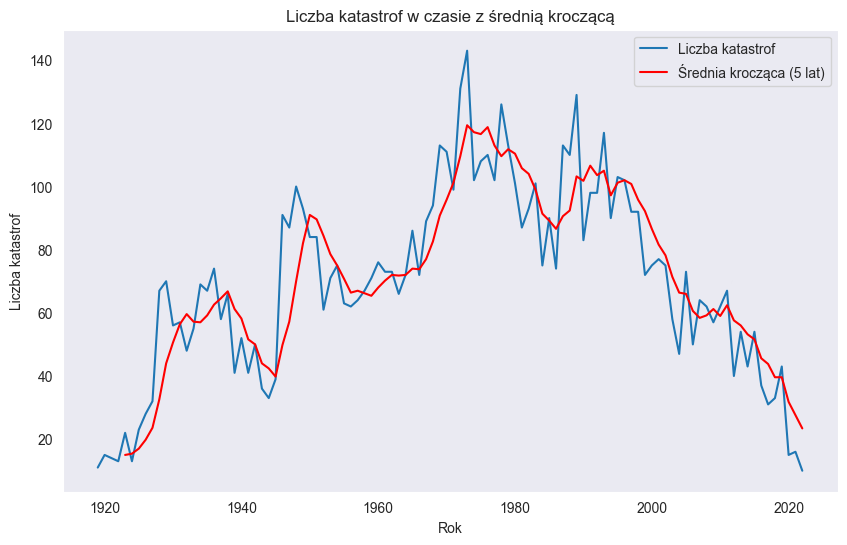

In [25]:
# Szereg czasowy - użycie średnich kroczącących oraz dekompozycje do analizy liczby katastrof w czasie

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Konwersja 'Date' na datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Grupowanie liczby katastrof rocznie
yearly_crashes = dataset['Date'].dt.year.value_counts().sort_index()

# Średnia krocząca (np. 5-letnia)
rolling_mean = yearly_crashes.rolling(window=5).mean()

# Wykres trendu i średniej kroczącej
plt.figure(figsize=(10, 6))
plt.plot(yearly_crashes.index, yearly_crashes.values, label='Liczba katastrof')
plt.plot(yearly_crashes.index, rolling_mean, label='Średnia krocząca (5 lat)', color='red')
plt.title('Liczba katastrof w czasie z średnią kroczącą')
plt.xlabel('Rok')
plt.ylabel('Liczba katastrof')
plt.legend()
plt.grid()
plt.show()

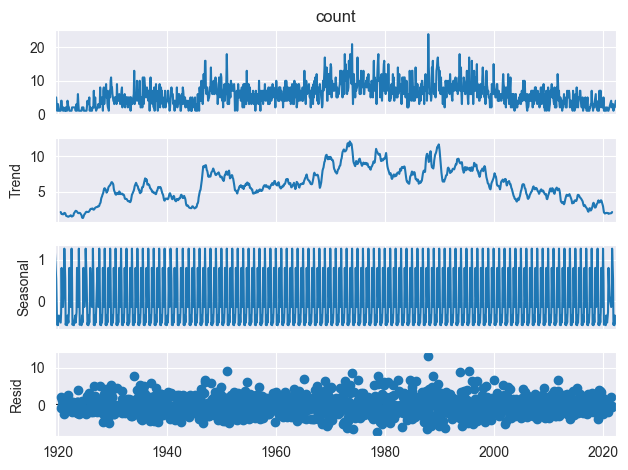

In [26]:
# Przygotowanie danych do dekompozycji (miesięczne dane)
monthly_crashes = dataset['Date'].dt.to_period('M').value_counts().sort_index()

# Konwersja na indeks czasowy
monthly_crashes.index = monthly_crashes.index.to_timestamp()

# Dekompozycja szeregów czasowych
decomposition = seasonal_decompose(monthly_crashes, model='additive', period=12)

# Wykres dekompozycji
decomposition.plot()
plt.show()

In [27]:
# Dane kategoryczne

from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# (ponowne) filtrowanie danych dla Polski
poland_data = dataset[dataset['Country'] == 'Poland']

# Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (ile katastrof związanych z konkretną przyczyną (crash cause) wystąpiło w różnych fazach lotu (flight phase)?)
crash_cause_vs_phase = pd.crosstab(poland_data['Crash cause'], poland_data['Flight phase'])

# Test chi-kwadrat (czy istnieje zaleznosc pomiedzy zmiennymi, jeśli p-wartość<0.05, zależność jest statystycznie istotna)
chi2, p, dof, expected = chi2_contingency(crash_cause_vs_phase)

# Wyświetlenie wyników
print("Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):")
print(crash_cause_vs_phase)
print(f"\nWyniki testu chi-kwadrat:")
print(f" - Wartość chi-kwadrat: {chi2:.2f}")
print(f" - p-wartość: {p:.4f}")
print(f" - Stopnie swobody: {dof}")

Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):
Flight phase       Flight  Landing (descent or approach)  Takeoff (climb)  \
Crash cause                                                                 
Human factor            1                              6                2   
Other causes            1                              0                0   
Technical failure       1                              4                0   
Unknown                 7                              8                0   
Weather                 2                              2                0   

Flight phase       Taxiing  Unknown  
Crash cause                          
Human factor             1        0  
Other causes             0        0  
Technical failure        0        0  
Unknown                  0        2  
Weather                  0        0  

Wyniki testu chi-kwadrat:
 - Wartość chi-kwadrat: 15.83
 - p-wartość: 0.4651
 - Stopnie swobody: 16


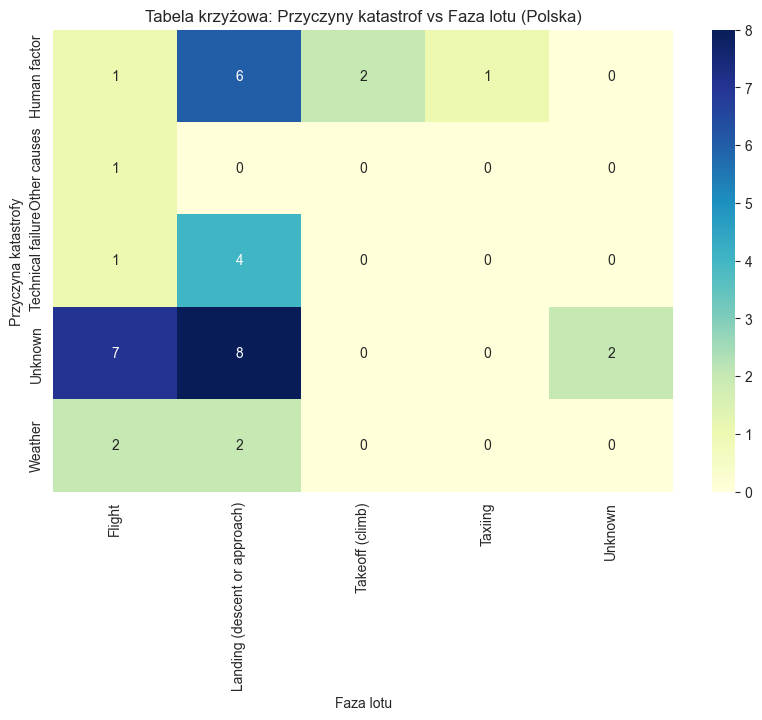

In [28]:
# Wizualizacja tabeli krzyżowej
plt.figure(figsize=(10, 6))
sns.heatmap(crash_cause_vs_phase, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska)')
plt.xlabel('Faza lotu')
plt.ylabel('Przyczyna katastrofy')
plt.show()

In [ ]:
# Interpretacja wykresu (tabela krzyżowa):
# Wykres przedstawia zależność między przyczyną katastrofy lotniczej (y-axis) a fazą lotu (x-axis) dla danych z Polski.
# Najwięcej przypadków oznaczono jako "Unknown" (przyczyna nieznana), co dominuje we wszystkich fazach lotu, szczególnie w fazie "Landing (descent or approach)".
# Przyczyny techniczne (Technical failure) i czynniki ludzkie (Human factor) również występują w kilku przypadkach, ale ich liczba jest relatywnie niewielka.

# Najwięcej incydentów występuje w fazie "Landing (descent or approach)", co jest zgodne z trendami globalnymi, gdzie lądowanie jest jedną z najbardziej krytycznych faz lotu. Faza "Flight" ma umiarkowaną liczbę incydentów, natomiast fazy takie jak "Takeoff (climb)" i "Taxiing" mają bardzo mało zdarzeń.

# Incydenty spowodowane warunkami pogodowymi są stosunkowo rzadkie, ale występują w fazach "Flight" oraz "Landing".
# Najwięcej zdarzeń dotyczy przyczyny "Unknown" w fazie "Landing", co może sugerować trudności w ustaleniu przyczyny w tej fazie.

# Ponieważ p-wartość (0.4651) jest większa niż 0.05, nie możemy odrzucić hipotezy zerowej. Hipoteza zerowa zakłada brak związku między przyczynami katastrof a fazami lotu.

In [29]:
# Dane ciągłe
# Regresja - czy starsze samoloty są bardziej narażone na katastrofy z większą liczbą ofiar?

from sklearn.linear_model import LinearRegression
import numpy as np

# Dane do regresji
X = dataset[['YOM']].fillna(0)
y = dataset['Total fatalities']

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Współczynniki regresji
print(f"Współczynnik nachylenia (slope): {model.coef_[0]:.2f}")
print(f"Wyraz wolny (intercept): {model.intercept_:.2f}")

Współczynnik nachylenia (slope): 0.22
Wyraz wolny (intercept): -411.79


In [31]:
# Współczynnik nachylenia 0.22 sugeruje, że nowsze samoloty mają minimalnie więcej ofiar. Wyraz wolny -411.79 jest nielogiczny i wskazuje na ograniczenia modelu - braki w YOM (wiek produkcji samolotu). Relacja między wiekiem samolotu a liczbą ofiar jest bardzo słaba.

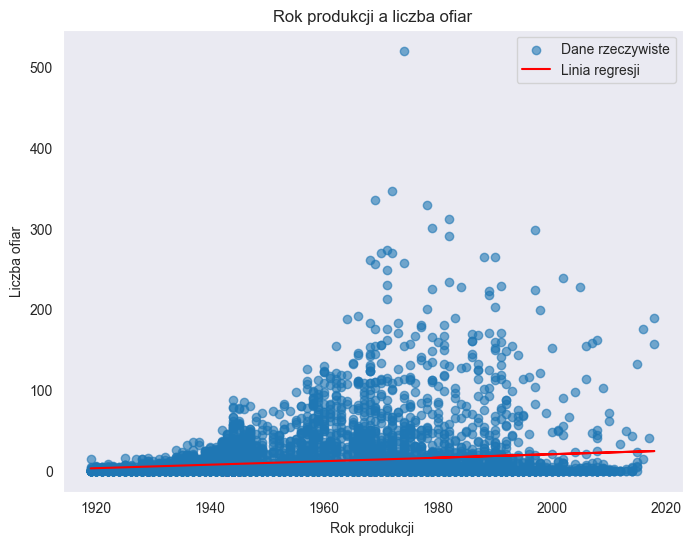

In [32]:
# Przewidywanie wartości
y_pred = model.predict(X)

# Wizualizacja regresji
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Dane rzeczywiste')
plt.plot(X, y_pred, color='red', label='Linia regresji')
plt.title('Rok produkcji a liczba ofiar')
plt.xlabel('Rok produkcji')
plt.ylabel('Liczba ofiar')
plt.legend()
plt.grid()
plt.show()

In [33]:
# Wykres pokazuje relację między rokiem produkcji a liczbą ofiar. Dane rzeczywiste są rozproszone, a linia regresji jest niemal pozioma, co wskazuje na bardzo słabą zależność. Starsze i nowsze samoloty mają podobny rozkład liczby ofiar, a regresja liniowa nie oddaje dobrze rzeczywistego wzorca.

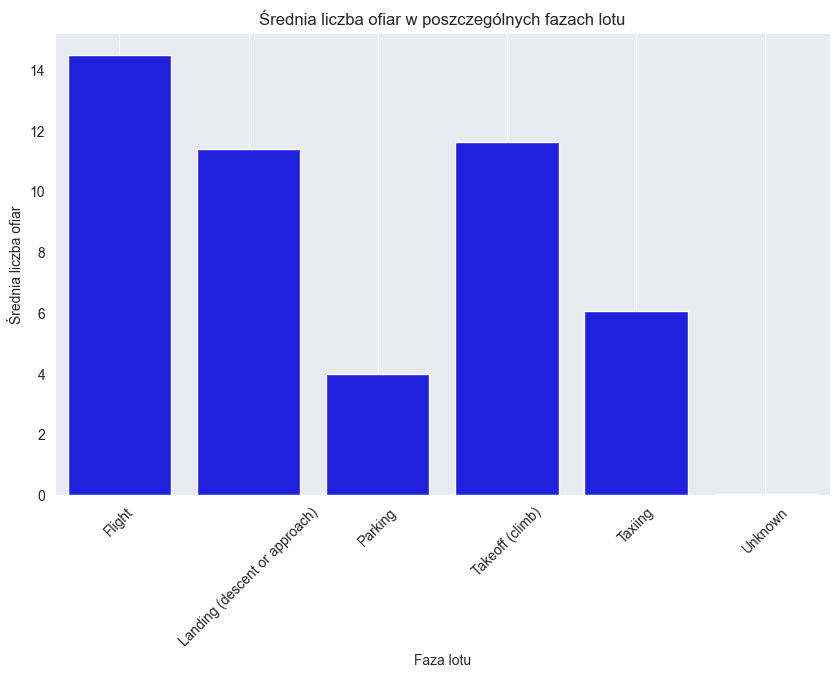

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grupowanie danych według fazy lotu i liczenie średniej liczby ofiar
phase_fatalities = dataset.groupby('Flight phase')['Total fatalities'].mean().reset_index()

# Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(data=phase_fatalities, x='Flight phase', y='Total fatalities', color='blue')
plt.title('Średnia liczba ofiar w poszczególnych fazach lotu')
plt.xlabel('Faza lotu')
plt.ylabel('Średnia liczba ofiar')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [35]:
# Wykres przedstawia średnią liczbę ofiar w różnych fazach lotu. Najwyższa średnia liczba ofiar występuje w fazach "Flight" i "Takeoff (climb)", co sugeruje, że są to bardziej ryzykowne etapy lotu. "Parking" ma najniższą średnią liczbę ofiar, co jest intuicyjne, ponieważ ta faza lotu jest najmniej dynamiczna. Faza "Landing (descent or approach)" również ma wysoką średnią.